In [1]:
import pandas as pd
import os

# --- PATHS ---
DATA_DIR = "../data/processed"
TAG_FILE = "../data/processed/apple_tags_list.txt"

# --- LOAD TAGS FROM FILE ---
with open(TAG_FILE, "r") as f:
    tags = [line.strip() for line in f.readlines() if line.strip()]

print(f"✅ Loaded {len(tags)} tags from {TAG_FILE}")

# --- LOAD FILES INTO SEPARATE DATAFRAMES ---
globals_dict = globals()  # allows creating df_<tag> variables dynamically
loaded_tags = []

for tag in tags:
    file_path = os.path.join(DATA_DIR, f"apple_{tag}.csv")
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            if "end" in df.columns:
                df["end"] = pd.to_datetime(df["end"], errors="coerce")
            
            var_name = f"df_{tag}"
            globals_dict[var_name] = df
            loaded_tags.append(tag)
            
            print(f"📄 Loaded {var_name:45} | Shape: {df.shape}")
        except Exception as e:
            print(f"⚠️ Error reading {tag}: {e}")
    else:
        print(f"🚫 Missing file for tag: {tag}")

print(f"\n✅ Successfully loaded {len(loaded_tags)} DataFrames.")

✅ Loaded 500 tags from ../data/processed/apple_tags_list.txt
🚫 Missing file for tag: AccountsPayable
🚫 Missing file for tag: AccountsPayableCurrent
📄 Loaded df_AccountsReceivableNetCurrent               | Shape: (136, 2)
🚫 Missing file for tag: AccruedIncomeTaxesCurrent
🚫 Missing file for tag: AccruedIncomeTaxesNoncurrent
🚫 Missing file for tag: AccruedLiabilities
🚫 Missing file for tag: AccruedLiabilitiesCurrent
🚫 Missing file for tag: AccruedMarketingCostsCurrent
🚫 Missing file for tag: AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment
🚫 Missing file for tag: AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax
🚫 Missing file for tag: AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax
🚫 Missing file for tag: AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax
🚫 Missing file for tag: AccumulatedOtherComprehensiveIncomeLossNetOfTax
🚫 Missing file for 

In [2]:
# List all variable names starting with "df_"
loaded_dfs = [var for var in globals() if var.startswith("df_") and isinstance(globals()[var], pd.DataFrame)]

print(f"📊 Total DataFrames loaded: {len(loaded_dfs)}\n")
for name in sorted(loaded_dfs):
    df = globals()[name]
    print(f"{name:45} | Shape: {df.shape}")

📊 Total DataFrames loaded: 28

df_AccountsReceivableNetCurrent               | Shape: (136, 2)
df_Assets                                     | Shape: (138, 2)
df_AssetsCurrent                              | Shape: (136, 2)
df_AssetsNoncurrent                           | Shape: (56, 2)
df_CashAndCashEquivalentsAtCarryingValue      | Shape: (220, 2)
df_DepreciationDepletionAndAmortization       | Shape: (66, 2)
df_GrossProfit                                | Shape: (325, 2)
df_IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest | Shape: (163, 2)
df_IncomeTaxExpenseBenefit                    | Shape: (221, 2)
df_IncreaseDecreaseInAccountsReceivable       | Shape: (155, 2)
df_IncreaseDecreaseInOtherReceivables         | Shape: (136, 2)
df_InventoryNet                               | Shape: (136, 2)
df_Liabilities                                | Shape: (136, 2)
df_LiabilitiesCurrent                         | Shape: (136, 2)
df_LiabilitiesNoncurrent  

In [3]:
from datetime import datetime

# Function to clean each DataFrame
def clean_df(df, tag_name):
    # Drop duplicates by 'end' and keep the latest value
    df = df.dropna(subset=['end'])
    df = df.sort_values('end').drop_duplicates('end', keep='last')

    # Ensure numeric column is proper float
    val_col = [c for c in df.columns if c != 'end'][0]
    df[val_col] = pd.to_numeric(df[val_col], errors='coerce')

    print(f"🧽 Cleaned {tag_name:45} | Unique dates: {len(df)}")
    return df.reset_index(drop=True)

# Apply cleaning to all df_*
for name in [v for v in globals() if v.startswith("df_")]:
    df = globals()[name]
    tag = name.replace("df_", "")
    globals()[name] = clean_df(df, tag)

🧽 Cleaned AccountsReceivableNetCurrent                  | Unique dates: 66
🧽 Cleaned Assets                                        | Unique dates: 66
🧽 Cleaned AssetsCurrent                                 | Unique dates: 66
🧽 Cleaned AssetsNoncurrent                              | Unique dates: 29
🧽 Cleaned CashAndCashEquivalentsAtCarryingValue         | Unique dates: 71
🧽 Cleaned DepreciationDepletionAndAmortization          | Unique dates: 34
🧽 Cleaned GrossProfit                                   | Unique dates: 70
🧽 Cleaned IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest | Unique dates: 54
🧽 Cleaned IncomeTaxExpenseBenefit                       | Unique dates: 70
🧽 Cleaned IncreaseDecreaseInAccountsReceivable          | Unique dates: 70
🧽 Cleaned IncreaseDecreaseInOtherReceivables            | Unique dates: 66
🧽 Cleaned InventoryNet                                  | Unique dates: 66
🧽 Cleaned Liabilities                                 

In [4]:
merged_df = None

for name in sorted([n for n in globals() if n.startswith("df_")]):
    df = globals()[name]
    tag_name = name.replace("df_", "")
    
    if merged_df is None:
        merged_df = df.copy()
    else:
        merged_df = pd.merge(merged_df, df, on="end", how="outer")

    print(f"🔗 Merged {tag_name:45} | Current shape: {merged_df.shape}")

# Final ordering
merged_df = merged_df.sort_values("end").reset_index(drop=True)

print("\n✅ Merging complete!")
print(f"📊 Final merged shape: {merged_df.shape}")
print(f"🗓️ Date range: {merged_df['end'].min()} → {merged_df['end'].max()}")

🔗 Merged AccountsReceivableNetCurrent                  | Current shape: (66, 2)
🔗 Merged Assets                                        | Current shape: (66, 3)
🔗 Merged AssetsCurrent                                 | Current shape: (66, 4)
🔗 Merged AssetsNoncurrent                              | Current shape: (66, 5)
🔗 Merged CashAndCashEquivalentsAtCarryingValue         | Current shape: (71, 6)
🔗 Merged DepreciationDepletionAndAmortization          | Current shape: (71, 7)
🔗 Merged GrossProfit                                   | Current shape: (71, 8)
🔗 Merged IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest | Current shape: (71, 9)
🔗 Merged IncomeTaxExpenseBenefit                       | Current shape: (71, 10)
🔗 Merged IncreaseDecreaseInAccountsReceivable          | Current shape: (71, 11)
🔗 Merged IncreaseDecreaseInOtherReceivables            | Current shape: (71, 12)
🔗 Merged InventoryNet                                  | Current shape:

In [5]:
merged_df

,end,AccountsReceivableNetCurrent,Assets,AssetsCurrent,AssetsNoncurrent,CashAndCashEquivalentsAtCarryingValue,DepreciationDepletionAndAmortization,GrossProfit,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,...,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingExpenses,OperatingIncomeLoss,PaymentsOfDividendsCommonStock,ResearchAndDevelopmentExpense,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,StockholdersEquity
0,2006-09-30,NaN,NaN,NaN,NaN,6392000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.984000e+09
1,2007-09-29,NaN,NaN,NaN,NaN,9352000000,NaN,8.152000e+09,NaN,1.511000e+09,...,5.470000e+09,3.495000e+09,3.745000e+09,4.407000e+09,NaN,7.820000e+08,NaN,NaN,2.457800e+10,1.453100e+10
2,2008-06-28,NaN,NaN,NaN,NaN,9373000000,NaN,2.600000e+09,NaN,4.380000e+08,...,5.301000e+09,1.072000e+09,1.208000e+09,1.392000e+09,NaN,2.920000e+08,NaN,NaN,7.464000e+09,NaN
3,2008-09-27,2.422000e+09,3.617100e+10,3.000600e+10,NaN,11875000000,NaN,1.319700e+10,NaN,2.828000e+09,...,9.596000e+09,6.119000e+09,4.870000e+09,8.327000e+09,NaN,1.109000e+09,NaN,NaN,3.749100e+10,2.229700e+10
4,2008-12-27,NaN,NaN,NaN,NaN,7236000000,NaN,4.507000e+09,NaN,1.004000e+09,...,3.938000e+09,2.255000e+09,1.406000e+09,3.101000e+09,NaN,3.150000e+08,NaN,NaN,1.188000e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2024-06-29,2.279500e+10,3.316120e+11,1.254350e+11,2.061770e+11,25565000000,8.534000e+09,3.967800e+10,2.549400e+10,4.046000e+09,...,9.144300e+10,2.144800e+10,1.432600e+10,2.535200e+10,NaN,8.006000e+09,8.577700e+10,NaN,NaN,6.670800e+10
67,2024-09-28,3.341000e+10,3.649800e+11,1.529870e+11,2.119930e+11,29943000000,1.144500e+10,1.806830e+11,1.234850e+11,2.974900e+10,...,1.182540e+11,9.373600e+10,5.746700e+10,1.232160e+11,NaN,3.137000e+10,3.910350e+11,NaN,NaN,5.695000e+10
68,2024-12-28,2.963900e+10,3.440850e+11,1.332400e+11,2.108450e+11,30299000000,3.080000e+09,5.827500e+10,4.258400e+10,6.254000e+09,...,2.993500e+10,3.633000e+10,1.544300e+10,4.283200e+10,NaN,8.268000e+09,1.243000e+11,NaN,NaN,6.675800e+10
69,2025-03-29,2.613600e+10,3.312330e+11,1.186740e+11,2.125590e+11,28162000000,5.741000e+09,4.486700e+10,2.931000e+10,4.530000e+09,...,5.388700e+10,2.478000e+10,1.527800e+10,2.958900e+10,NaN,8.550000e+09,9.535900e+10,NaN,NaN,6.679600e+10


In [6]:
# Scale all numeric columns (except 'end') to millions
for col in merged_df.columns:
    if col != 'end':
        merged_df[col] = merged_df[col] / 1_000_000

print("✅ All numeric values scaled to millions (USD → Millions)")
merged_df.head()

✅ All numeric values scaled to millions (USD → Millions)


,end,AccountsReceivableNetCurrent,Assets,AssetsCurrent,AssetsNoncurrent,CashAndCashEquivalentsAtCarryingValue,DepreciationDepletionAndAmortization,GrossProfit,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,...,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingExpenses,OperatingIncomeLoss,PaymentsOfDividendsCommonStock,ResearchAndDevelopmentExpense,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,StockholdersEquity
0,2006-09-30,NaN,NaN,NaN,NaN,6392.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9984.0
1,2007-09-29,NaN,NaN,NaN,NaN,9352.0,NaN,8152.0,NaN,1511.0,...,5470.0,3495.0,3745.0,4407.0,NaN,782.0,NaN,NaN,24578.0,14531.0
2,2008-06-28,NaN,NaN,NaN,NaN,9373.0,NaN,2600.0,NaN,438.0,...,5301.0,1072.0,1208.0,1392.0,NaN,292.0,NaN,NaN,7464.0,NaN
3,2008-09-27,2422.0,36171.0,30006.0,NaN,11875.0,NaN,13197.0,NaN,2828.0,...,9596.0,6119.0,4870.0,8327.0,NaN,1109.0,NaN,NaN,37491.0,22297.0
4,2008-12-27,NaN,NaN,NaN,NaN,7236.0,NaN,4507.0,NaN,1004.0,...,3938.0,2255.0,1406.0,3101.0,NaN,315.0,NaN,NaN,11880.0,NaN


In [7]:
merged_df['Year'] = pd.to_datetime(merged_df['end']).dt.year
merged_df = merged_df.sort_values('Year').reset_index(drop=True)

In [8]:
merged_df

,end,AccountsReceivableNetCurrent,Assets,AssetsCurrent,AssetsNoncurrent,CashAndCashEquivalentsAtCarryingValue,DepreciationDepletionAndAmortization,GrossProfit,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,...,NetIncomeLoss,OperatingExpenses,OperatingIncomeLoss,PaymentsOfDividendsCommonStock,ResearchAndDevelopmentExpense,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,StockholdersEquity,Year
0,2006-09-30,NaN,NaN,NaN,NaN,6392.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9984.0,2006
1,2007-09-29,NaN,NaN,NaN,NaN,9352.0,NaN,8152.0,NaN,1511.0,...,3495.0,3745.0,4407.0,NaN,782.0,NaN,NaN,24578.0,14531.0,2007
2,2008-06-28,NaN,NaN,NaN,NaN,9373.0,NaN,2600.0,NaN,438.0,...,1072.0,1208.0,1392.0,NaN,292.0,NaN,NaN,7464.0,NaN,2008
3,2008-09-27,2422.0,36171.0,30006.0,NaN,11875.0,NaN,13197.0,NaN,2828.0,...,6119.0,4870.0,8327.0,NaN,1109.0,NaN,NaN,37491.0,22297.0,2008
4,2008-12-27,NaN,NaN,NaN,NaN,7236.0,NaN,4507.0,NaN,1004.0,...,2255.0,1406.0,3101.0,NaN,315.0,NaN,NaN,11880.0,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2024-09-28,33410.0,364980.0,152987.0,211993.0,29943.0,11445.0,180683.0,123485.0,29749.0,...,93736.0,57467.0,123216.0,NaN,31370.0,391035.0,NaN,NaN,56950.0,2024
67,2024-03-30,21837.0,337411.0,128416.0,208995.0,32695.0,5684.0,97126.0,68381.0,4422.0,...,57552.0,14371.0,27900.0,NaN,7903.0,90753.0,NaN,NaN,74194.0,2024
68,2024-12-28,29639.0,344085.0,133240.0,210845.0,30299.0,3080.0,58275.0,42584.0,6254.0,...,36330.0,15443.0,42832.0,NaN,8268.0,124300.0,NaN,NaN,66758.0,2024
69,2025-03-29,26136.0,331233.0,118674.0,212559.0,28162.0,5741.0,44867.0,29310.0,4530.0,...,24780.0,15278.0,29589.0,NaN,8550.0,95359.0,NaN,NaN,66796.0,2025


In [9]:
# Ensure 'end' is datetime
merged_df['end'] = pd.to_datetime(merged_df['end'], errors='coerce')

# Extract month (as number and name)
merged_df['Month'] = merged_df['end'].dt.month
merged_df['Month_Name'] = merged_df['end'].dt.strftime('%B')

print("✅ Added Month and Month_Name columns.")
display(merged_df[['end', 'Year', 'Month', 'Month_Name']].head(10))

✅ Added Month and Month_Name columns.


,end,Year,Month,Month_Name
0,2006-09-30,2006,9,September
1,2007-09-29,2007,9,September
2,2008-06-28,2008,6,June
3,2008-09-27,2008,9,September
4,2008-12-27,2008,12,December
5,2009-03-28,2009,3,March
6,2009-06-27,2009,6,June
7,2009-09-26,2009,9,September
8,2009-12-26,2009,12,December
9,2010-03-27,2010,3,March


In [10]:
# Ensure Year & Month exist
if 'Year' not in merged_df.columns:
    merged_df['Year'] = pd.to_datetime(merged_df['end']).dt.year
if 'Month' not in merged_df.columns:
    merged_df['Month'] = pd.to_datetime(merged_df['end']).dt.month

# Group and check duplicates
duplicates = merged_df.groupby(['Year', 'Month']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

if not duplicates.empty:
    print("⚠️ Found duplicate Year–Month entries:")
    display(duplicates)
    dup_rows = merged_df.merge(duplicates[['Year', 'Month']], on=['Year', 'Month'], how='inner')
    display(dup_rows.sort_values(['Year', 'Month']).head(10))
else:
    print("✅ No duplicate Year–Month combinations found.")

✅ No duplicate Year–Month combinations found.


In [12]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.0 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


🔍 Missing values summary:


,Column,Missing_Values,Missing_%
0,Revenues,62,87.32
1,PaymentsOfDividendsCommonStock,62,87.32
2,LiabilitiesNoncurrent,42,59.15
3,AssetsNoncurrent,42,59.15
4,RevenueFromContractWithCustomerExcludingAssess...,39,54.93
5,DepreciationDepletionAndAmortization,37,52.11
6,LongTermDebtNoncurrent,29,40.85
7,SalesRevenueNet,29,40.85
8,IncomeLossFromContinuingOperationsBeforeIncome...,17,23.94
9,NetCashProvidedByUsedInOperatingActivities,8,11.27


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_53101/220591407.py:21: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


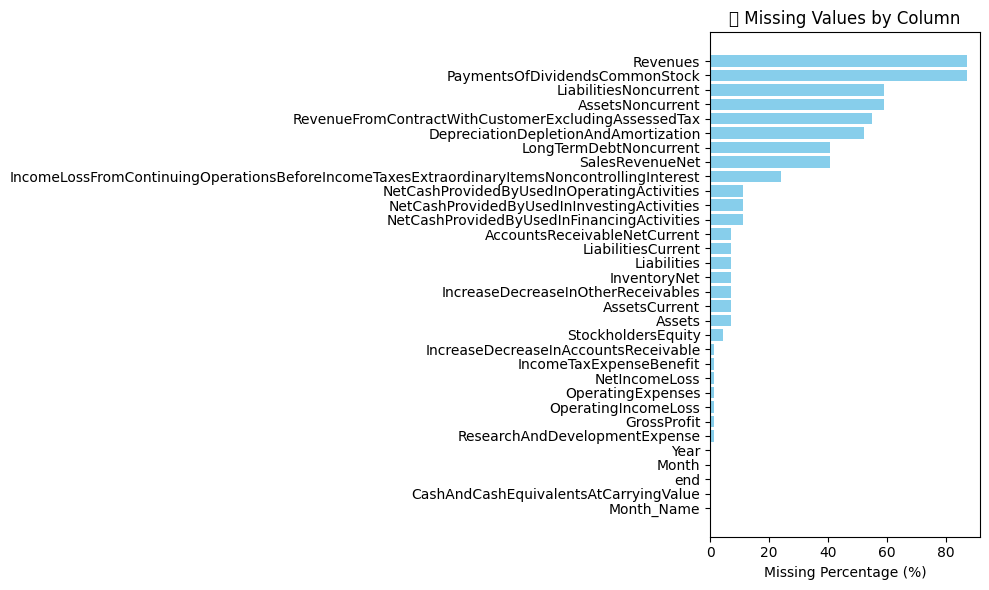

In [13]:
import matplotlib.pyplot as plt

# --- 1️⃣ Check total missing values per column ---
missing_counts = merged_df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(merged_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Values': missing_counts,
    'Missing_%': missing_percent.round(2)
}).reset_index().rename(columns={'index': 'Column'})

print("🔍 Missing values summary:")
display(missing_df.head(15))

# --- 2️⃣ Visualize ---
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Column'], missing_df['Missing_%'], color='skyblue')
plt.xlabel("Missing Percentage (%)")
plt.title("📉 Missing Values by Column")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
# --- Step 1: Calculate missing %
missing_summary = merged_df.isna().mean() * 100

# --- Step 2: Drop columns with >60% missing ---
threshold = 60  # percent
cols_to_drop = missing_summary[missing_summary > threshold].index.tolist()

print("🧾 Columns to drop due to high missing values (>60%):")
for c in cols_to_drop:
    print(f" - {c}")

merged_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"\n✅ Dropped {len(cols_to_drop)} columns. Remaining: {merged_df.shape[1]} columns.")

🧾 Columns to drop due to high missing values (>60%):
 - PaymentsOfDividendsCommonStock
 - Revenues

✅ Dropped 2 columns. Remaining: 30 columns.


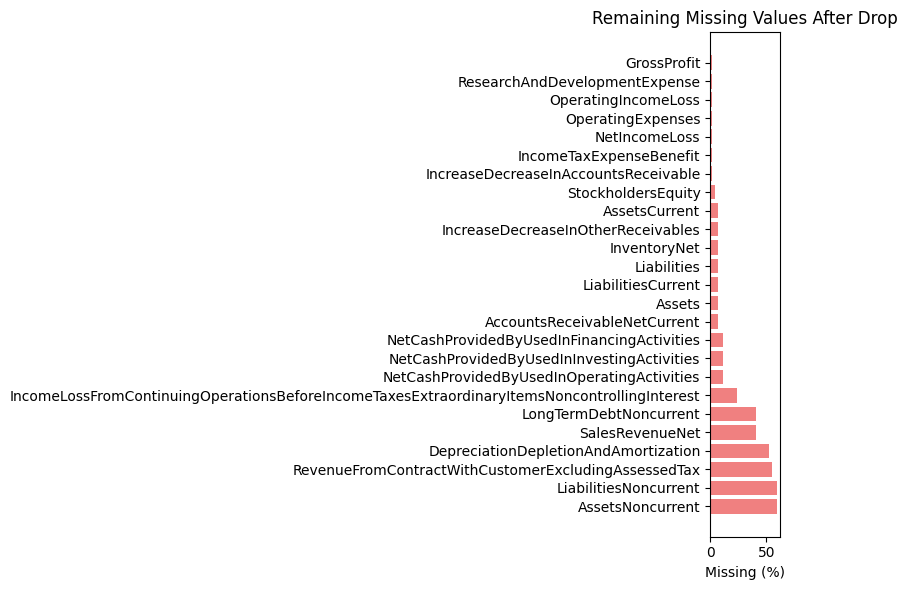

In [15]:
import matplotlib.pyplot as plt

missing_after = merged_df.isna().mean() * 100
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.barh(missing_after.index, missing_after.values, color='lightcoral')
plt.title("Remaining Missing Values After Drop")
plt.xlabel("Missing (%)")
plt.tight_layout()
plt.show()

In [16]:
# Identify which columns have >30% missing
missing_summary = merged_df.isna().mean() * 100
high_missing_cols = missing_summary[missing_summary > 30].index.tolist()

print("🔍 Columns with more than 30% missing values:")
for c in high_missing_cols:
    print(f" - {c}")

🔍 Columns with more than 30% missing values:
 - AssetsNoncurrent
 - DepreciationDepletionAndAmortization
 - LiabilitiesNoncurrent
 - LongTermDebtNoncurrent
 - RevenueFromContractWithCustomerExcludingAssessedTax
 - SalesRevenueNet


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_53101/3614528723.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


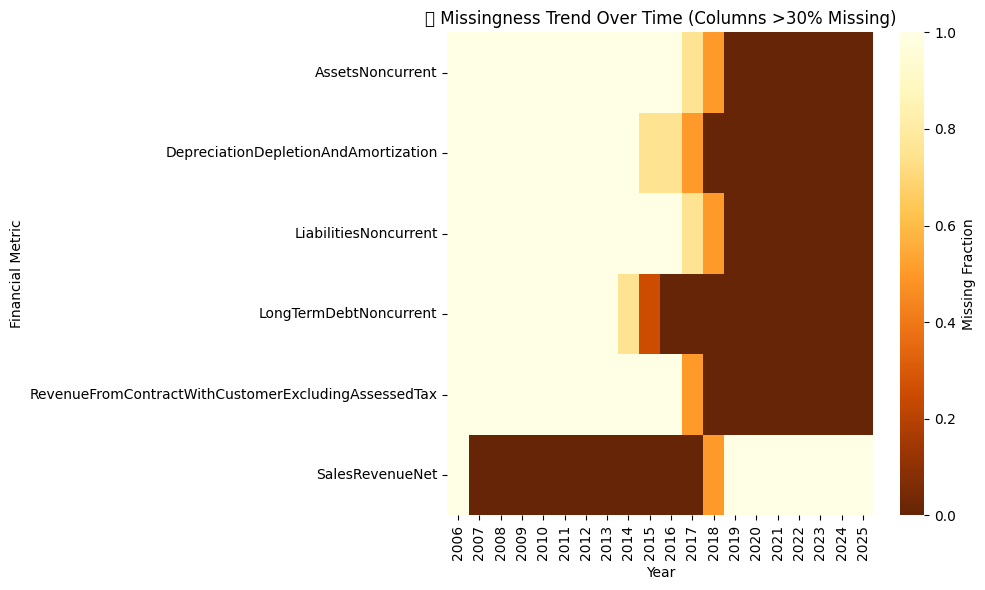

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Year' column exists
if 'Year' not in merged_df.columns:
    merged_df['Year'] = pd.to_datetime(merged_df['end']).dt.year

# Create a boolean matrix for missingness
missing_by_year = merged_df.groupby('Year')[high_missing_cols].apply(lambda x: x.isna().mean())

plt.figure(figsize=(10, 6))
sns.heatmap(missing_by_year.T, cmap="YlOrBr_r", cbar_kws={'label': 'Missing Fraction'})
plt.title("📊 Missingness Trend Over Time (Columns >30% Missing)")
plt.xlabel("Year")
plt.ylabel("Financial Metric")
plt.tight_layout()
plt.show()

In [18]:
# Calculate missing percentage per column
missing_percent = merged_df.isna().mean() * 100

# Select columns with less than 30% missing values (excluding date columns)
low_missing_cols = missing_percent[(missing_percent < 30) & (~missing_percent.index.isin(['end','Year','Month','Month_Name']))].index.tolist()

print(f"✅ Columns with <30% missing values ({len(low_missing_cols)}):")
print(low_missing_cols)

✅ Columns with <30% missing values (20):
['AccountsReceivableNetCurrent', 'Assets', 'AssetsCurrent', 'CashAndCashEquivalentsAtCarryingValue', 'GrossProfit', 'IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest', 'IncomeTaxExpenseBenefit', 'IncreaseDecreaseInAccountsReceivable', 'IncreaseDecreaseInOtherReceivables', 'InventoryNet', 'Liabilities', 'LiabilitiesCurrent', 'NetCashProvidedByUsedInFinancingActivities', 'NetCashProvidedByUsedInInvestingActivities', 'NetCashProvidedByUsedInOperatingActivities', 'NetIncomeLoss', 'OperatingExpenses', 'OperatingIncomeLoss', 'ResearchAndDevelopmentExpense', 'StockholdersEquity']


In [19]:
# Create year-based missing matrix
year_missing = (
    merged_df.groupby('Year')[low_missing_cols]
    .apply(lambda x: x.isna().mean())
    .T
)

# Sort years chronologically
year_missing = year_missing.sort_index(axis=1)

/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_53101/3737137366.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


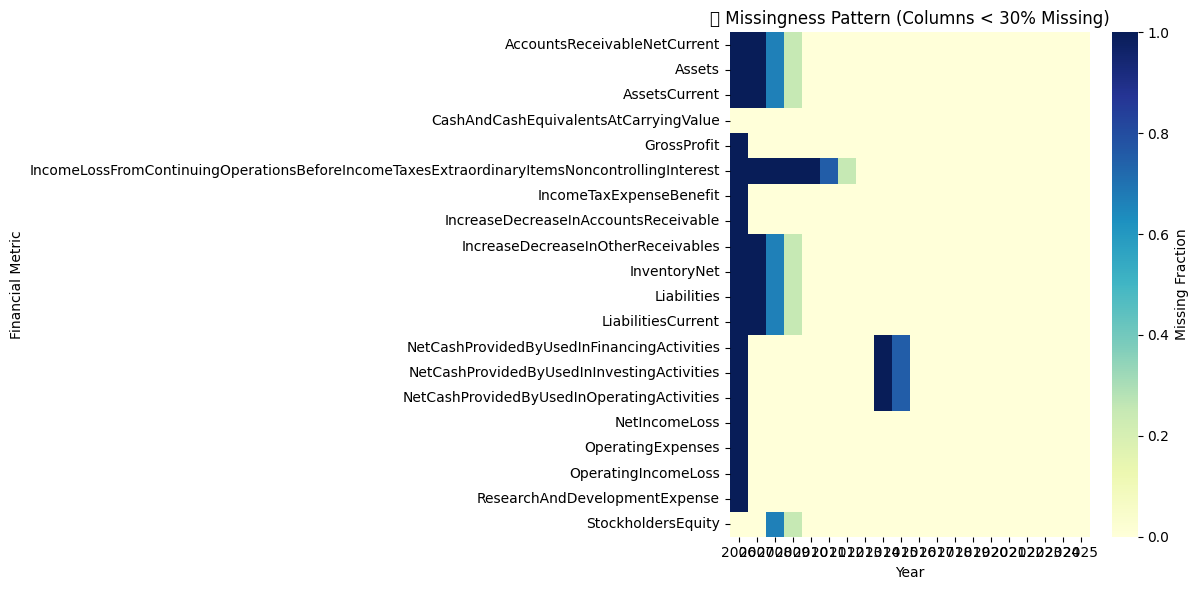

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(year_missing, cmap="YlGnBu", cbar_kws={'label': 'Missing Fraction'})
plt.title("📆 Missingness Pattern (Columns < 30% Missing)")
plt.xlabel("Year")
plt.ylabel("Financial Metric")
plt.tight_layout()
plt.show()

In [21]:
# --- Compute average missingness per year ---
avg_missing_by_year = year_missing.mean(axis=0).sort_values()

# Convert to DataFrame
clean_years_df = avg_missing_by_year.reset_index()
clean_years_df.columns = ['Year', 'Avg_Missing_%']
clean_years_df['Avg_Missing_%'] = clean_years_df['Avg_Missing_%'] * 100

print("📊 Average Missingness by Year (lower = cleaner):")
print(clean_years_df)

📊 Average Missingness by Year (lower = cleaner):
    Year  Avg_Missing_%
0   2025       0.000000
1   2023       0.000000
2   2022       0.000000
3   2021       0.000000
4   2013       0.000000
5   2020       0.000000
6   2024       0.000000
7   2016       0.000000
8   2017       0.000000
9   2018       0.000000
10  2019       0.000000
11  2012       1.250000
12  2011       3.750000
13  2010       5.000000
14  2015      11.250000
15  2009      15.000000
16  2014      15.000000
17  2008      31.666667
18  2007      40.000000
19  2006      90.000000


In [22]:
# --- Flag years with ≥90% data completeness ---
threshold = 10  # i.e., less than 10% missing
clean_years = clean_years_df[clean_years_df['Avg_Missing_%'] < threshold]['Year']

start_year, end_year = clean_years.min(), clean_years.max()
print(f"✅ Recommended clean analysis window: {start_year}–{end_year}")

✅ Recommended clean analysis window: 2010–2025


In [23]:
clean_df = merged_df[(merged_df['Year'] >= 2010) & (merged_df['Year'] <= 2025)].copy()
print(f"✅ Filtered data shape: {clean_df.shape}")

✅ Filtered data shape: (62, 30)


In [24]:
missing_summary = clean_df.isna().mean() * 100
missing_summary = missing_summary.sort_values(ascending=False)
print("📊 Missing value percentage per column (2010–2025):")
print(missing_summary)

📊 Missing value percentage per column (2010–2025):
LiabilitiesNoncurrent                                                                          53.225806
AssetsNoncurrent                                                                               53.225806
RevenueFromContractWithCustomerExcludingAssessedTax                                            48.387097
DepreciationDepletionAndAmortization                                                           45.161290
SalesRevenueNet                                                                                45.161290
LongTermDebtNoncurrent                                                                         32.258065
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest    12.903226
NetCashProvidedByUsedInFinancingActivities                                                     11.290323
NetCashProvidedByUsedInOperatingActivities                                                     11.290323
NetC

In [25]:
# Define threshold
fill_threshold = 20

# Identify columns with less than 20% missing values
cols_to_fill = missing_summary[missing_summary < fill_threshold].index.tolist()
print(f"✅ Columns eligible for fill: {len(cols_to_fill)}")
print(cols_to_fill)

✅ Columns eligible for fill: 24
['IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest', 'NetCashProvidedByUsedInFinancingActivities', 'NetCashProvidedByUsedInOperatingActivities', 'NetCashProvidedByUsedInInvestingActivities', 'StockholdersEquity', 'Year', 'Month', 'ResearchAndDevelopmentExpense', 'OperatingIncomeLoss', 'OperatingExpenses', 'NetIncomeLoss', 'end', 'AccountsReceivableNetCurrent', 'LiabilitiesCurrent', 'Liabilities', 'InventoryNet', 'IncreaseDecreaseInOtherReceivables', 'IncreaseDecreaseInAccountsReceivable', 'IncomeTaxExpenseBenefit', 'GrossProfit', 'CashAndCashEquivalentsAtCarryingValue', 'AssetsCurrent', 'Assets', 'Month_Name']


In [26]:
for col in cols_to_fill:
    clean_df[col] = clean_df[col].ffill().bfill()

In [27]:
for col in cols_to_fill:
    if clean_df[col].isna().sum() > 0:
        clean_df[col].fillna(clean_df[col].mean(), inplace=True)

In [28]:
print("✅ Missing values after fill:")
print(clean_df.isna().sum()[clean_df.isna().sum() > 0])

✅ Missing values after fill:
AssetsNoncurrent                                       33
DepreciationDepletionAndAmortization                   28
LiabilitiesNoncurrent                                  33
LongTermDebtNoncurrent                                 20
RevenueFromContractWithCustomerExcludingAssessedTax    30
SalesRevenueNet                                        28
dtype: int64


In [29]:
# ✅ Show columns with 0 missing values
no_missing = clean_df.columns[clean_df.isna().sum() == 0].tolist()

print(f"✅ Total fully clean columns: {len(no_missing)}")
for col in no_missing:
    print("-", col)

✅ Total fully clean columns: 24
- end
- AccountsReceivableNetCurrent
- Assets
- AssetsCurrent
- CashAndCashEquivalentsAtCarryingValue
- GrossProfit
- IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest
- IncomeTaxExpenseBenefit
- IncreaseDecreaseInAccountsReceivable
- IncreaseDecreaseInOtherReceivables
- InventoryNet
- Liabilities
- LiabilitiesCurrent
- NetCashProvidedByUsedInFinancingActivities
- NetCashProvidedByUsedInInvestingActivities
- NetCashProvidedByUsedInOperatingActivities
- NetIncomeLoss
- OperatingExpenses
- OperatingIncomeLoss
- ResearchAndDevelopmentExpense
- StockholdersEquity
- Year
- Month
- Month_Name


In [31]:
# --- 1️⃣ Select the 24 clean columns ---
clean_cols = [
    'end',
    'AccountsReceivableNetCurrent',
    'Assets',
    'AssetsCurrent',
    'CashAndCashEquivalentsAtCarryingValue',
    'GrossProfit',
    'IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest',
    'IncomeTaxExpenseBenefit',
    'IncreaseDecreaseInAccountsReceivable',
    'IncreaseDecreaseInOtherReceivables',
    'InventoryNet',
    'Liabilities',
    'LiabilitiesCurrent',
    'NetCashProvidedByUsedInFinancingActivities',
    'NetCashProvidedByUsedInInvestingActivities',
    'NetCashProvidedByUsedInOperatingActivities',
    'NetIncomeLoss',
    'OperatingExpenses',
    'OperatingIncomeLoss',
    'ResearchAndDevelopmentExpense',
    'StockholdersEquity',
    'Year',
    'Month',
    'Month_Name'
]

# --- 2️⃣ Create a new DataFrame with these columns ---
clean_df_24 = merged_df[clean_cols].copy()

# --- 3️⃣ Save to CSV ---
output_path = "../data/processed/apple_clean_24cols.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
clean_df_24.to_csv(output_path, index=False)

print(f"✅ Clean 24-column dataset saved → {output_path}")
print(f"📊 Shape: {clean_df_24.shape}")

✅ Clean 24-column dataset saved → ../data/processed/apple_clean_24cols.csv
📊 Shape: (71, 24)
